In [7]:
import anndata
import pandas as pd
import anndata as ad
import os
import numpy as np
import seaborn as sns

In [8]:
outdir='/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_publication'

In [9]:
dpd_scores = pd.read_pickle(os.path.join(outdir, 'dpd_p_r_high_neu.pkl'))

norm_s_df = pd.read_pickle(os.path.join(outdir, 'stv_p_r_high_neu.pkl'))

In [10]:
dpd_scores

,DPD_pneu_rneu
CellID,
AAAGTCCAGACGAGCT-1-SF2990,-10.627369
AACCAACCATCGATCA-1-SF2990,-0.924481
AAGAACAAGCCTGACC-1-SF2990,-0.924482
AAGATAGGTTGTTTGG-1-SF2990,-1.747593
AAGTCGTCACAACCGC-1-SF2990,-0.924481
...,...
GTCAAACCATGCCGAC-1-SF9494,5.854174
TATATCCAGGCGTTAG-1-SF9494,0.973553
TCAAGACGTGCAGGAT-1-SF9494,0.924482


In [11]:
neurons_adata= ad.read_h5ad(os.path.join(outdir,'gbm_scvi_neurons.h5ad'))

In [12]:
neurons_adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,source,_scvi_batch,_scvi_labels,leiden,Cellid,Tumor_Normal_annotation,solo,custom_annotation,Status
CellID,,,,,,,,,,,,,,
AAACCCAAGGGATCAC-1-SF2777,468,468,579.0,9.0,1.554404,SF2777,0,0,0,AAACCCAAGGGATCAC-1,Tumor,singlet,Tumor,Recurrent
AAACCCAGTCGATTTG-1-SF2777,311,311,402.0,4.0,0.995025,SF2777,0,0,6,AAACCCAGTCGATTTG-1,Tumor,singlet,Tumor,Recurrent
AAACCCAGTCGTCAGC-1-SF2777,864,864,1518.0,3.0,0.197628,SF2777,0,0,6,AAACCCAGTCGTCAGC-1,Tumor,singlet,Tumor,Recurrent
AAACCCAGTTGTAAAG-1-SF2777,632,632,891.0,12.0,1.346801,SF2777,0,0,0,AAACCCAGTTGTAAAG-1,Tumor,singlet,Tumor,Recurrent
AAACCCATCTATCGGA-1-SF2777,849,849,1338.0,43.0,3.213752,SF2777,0,0,0,AAACCCATCTATCGGA-1,Tumor,singlet,Tumor,Recurrent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCATTATCC-1-SF9494,2027,2027,4502.0,0.0,0.000000,SF9494,15,0,2,TTTGGTTTCATTATCC-1,Normal,singlet,Oligodendrocytes,Recurrent
TTTGGTTTCCCTCGTA-1-SF9494,1972,1972,4071.0,0.0,0.000000,SF9494,15,0,2,TTTGGTTTCCCTCGTA-1,Normal,singlet,Oligodendrocytes,Recurrent
TTTGTTGTCAGACAAA-1-SF9494,2340,2340,5272.0,0.0,0.000000,SF9494,15,0,13,TTTGTTGTCAGACAAA-1,Tumor,singlet,Tumor,Recurrent


In [13]:
neurons_adata.obs.columns

Index(['n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt',
       'pct_counts_mt', 'source', '_scvi_batch', '_scvi_labels', 'leiden',
       'Cellid', 'Tumor_Normal_annotation', 'solo', 'custom_annotation',
       'Status'],
      dtype='object')

In [14]:
anno =neurons_adata.obs.reset_index()

In [15]:
#Adding annotations
dpd_scores.reset_index(inplace=True)
dpd_scores_high_dim_annotated = dpd_scores.merge(anno[['CellID','Tumor_Normal_annotation', 'custom_annotation',
       'Status']],on = 'CellID',how='left')

In [16]:
dpd_scores_high_dim_annotated.set_index('CellID',inplace=True)

In [17]:
dpd_scores_high_dim_annotated[dpd_scores_high_dim_annotated['Status'] == 'Primary']

,DPD_pneu_rneu,Tumor_Normal_annotation,custom_annotation,Status
CellID,,,,
AAAGTCCAGACGAGCT-1-SF2990,-10.627369,Normal,Neurons,Primary
AACCAACCATCGATCA-1-SF2990,-0.924481,Normal,Neurons,Primary
AAGAACAAGCCTGACC-1-SF2990,-0.924482,Normal,Neurons,Primary
AAGATAGGTTGTTTGG-1-SF2990,-1.747593,Normal,Neurons,Primary
AAGTCGTCACAACCGC-1-SF2990,-0.924481,Normal,Neurons,Primary
...,...,...,...,...
GGAGAACCATAGGCGA-1-SF9798,-0.924477,Normal,Neurons,Primary
GGGAGATCAGTGTGCC-1-SF9798,-0.924482,Normal,Neurons,Primary
TACCCGTAGCATCCTA-1-SF9798,-0.924481,Normal,Neurons,Primary


In [18]:
dpd_scores_high_dim_annotated[dpd_scores_high_dim_annotated['Status'] == 'Recurrent']

,DPD_pneu_rneu,Tumor_Normal_annotation,custom_annotation,Status
CellID,,,,
AAACGCTCATCCTCAC-1-SF2777,2.512838,Normal,Neurons,Recurrent
AAAGGTAGTTTGTGGT-1-SF2777,0.924475,Normal,Neurons,Recurrent
AAAGTCCCAACTGCCG-1-SF2777,0.924476,Normal,Neurons,Recurrent
AAATGGAGTAGGAGGG-1-SF2777,1.985327,Normal,Neurons,Recurrent
AACACACCAAGTTCCA-1-SF2777,1.213222,Normal,Neurons,Recurrent
...,...,...,...,...
GTCAAACCATGCCGAC-1-SF9494,5.854174,Normal,Neurons,Recurrent
TATATCCAGGCGTTAG-1-SF9494,0.973553,Normal,Neurons,Recurrent
TCAAGACGTGCAGGAT-1-SF9494,0.924482,Normal,Neurons,Recurrent


In [19]:
dpd_scores_high_dim_annotated['zeros']= 0

<Axes: xlabel='DPD_pneu_rneu', ylabel='zeros'>

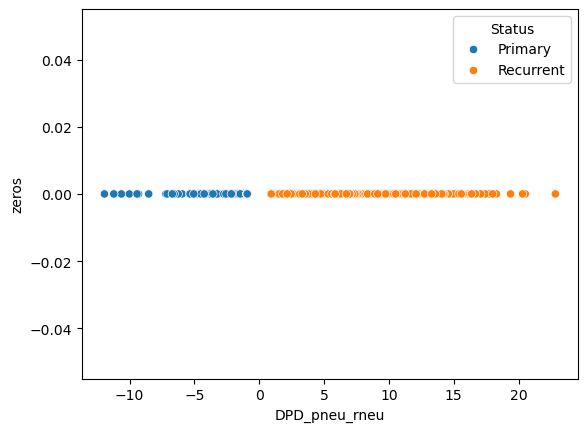

In [20]:
sns.scatterplot(x='DPD_pneu_rneu',y='zeros',data=dpd_scores_high_dim_annotated,hue='Status')

### Landmark genes results


In [21]:
dpd_scores_lincs = pd.read_pickle(os.path.join(outdir, 'dpd_p_r_lincs_neu.pkl'))

norm_s_lincs = pd.read_pickle(os.path.join(outdir, 'stv_p_r_lincs_neu.pkl'))

In [22]:
#Adding annotations
dpd_scores_lincs.reset_index(inplace=True)
dpd_scores_lincs_dim_annotated = dpd_scores_lincs.merge(anno[['CellID','Tumor_Normal_annotation', 'custom_annotation',
       'Status']],on = 'CellID',how='left')

In [23]:
dpd_scores_lincs_dim_annotated

,CellID,DPD_pneu_rneu,Tumor_Normal_annotation,custom_annotation,Status
0,AAAGTCCAGACGAGCT-1-SF2990,-0.793078,Normal,Neurons,Primary
1,AACCAACCATCGATCA-1-SF2990,-0.043446,Normal,Neurons,Primary
2,AAGAACAAGCCTGACC-1-SF2990,-1.997220,Normal,Neurons,Primary
3,AAGATAGGTTGTTTGG-1-SF2990,-0.043529,Normal,Neurons,Primary
4,AAGTCGTCACAACCGC-1-SF2990,-0.198019,Normal,Neurons,Primary
...,...,...,...,...,...
2541,GTCAAACCATGCCGAC-1-SF9494,0.094343,Normal,Neurons,Recurrent
2542,TATATCCAGGCGTTAG-1-SF9494,0.117534,Normal,Neurons,Recurrent
2543,TCAAGACGTGCAGGAT-1-SF9494,0.635719,Normal,Neurons,Recurrent
2544,TCTTTGAGTACAGTCT-1-SF9494,0.467772,Normal,Neurons,Recurrent


In [24]:
dpd_scores_lincs_dim_annotated['zeros']= 0

<Axes: xlabel='DPD_pneu_rneu', ylabel='zeros'>

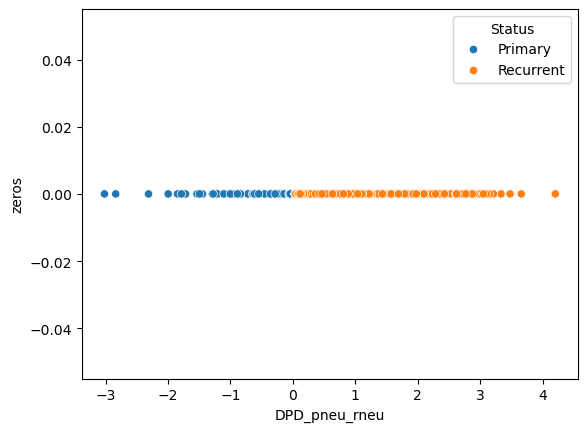

In [25]:
sns.scatterplot(x='DPD_pneu_rneu',y='zeros',data=dpd_scores_lincs_dim_annotated,hue='Status')

<Axes: >

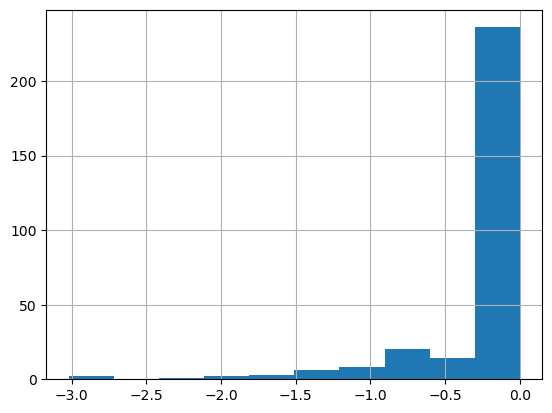

In [26]:
dpd_scores_lincs_dim_annotated[dpd_scores_lincs_dim_annotated['Status'] == 'Primary']['DPD_pneu_rneu'].hist()

<Axes: >

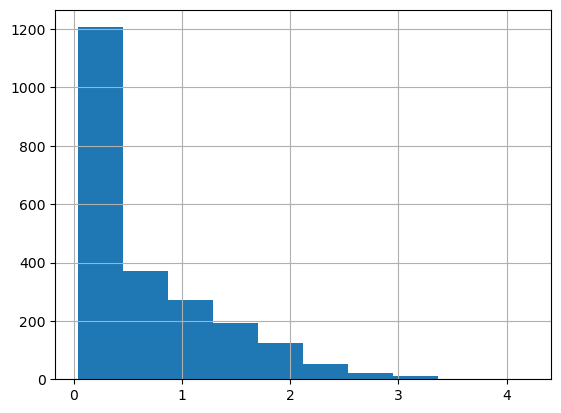

In [27]:
dpd_scores_lincs_dim_annotated[dpd_scores_lincs_dim_annotated['Status'] == 'Recurrent']['DPD_pneu_rneu'].hist()

/tmp/ipykernel_1729749/1900661844.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Status', y='DPD_pneu_rneu', data=dpd_scores_lincs_dim_annotated, palette='Set2')


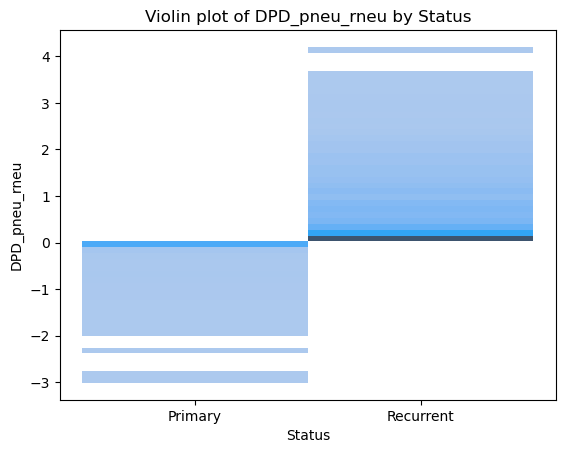

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Status', y='DPD_pneu_rneu', data=dpd_scores_lincs_dim_annotated, palette='Set2')
plt.title('Violin plot of DPD_pneu_rneu by Status')
plt.show()


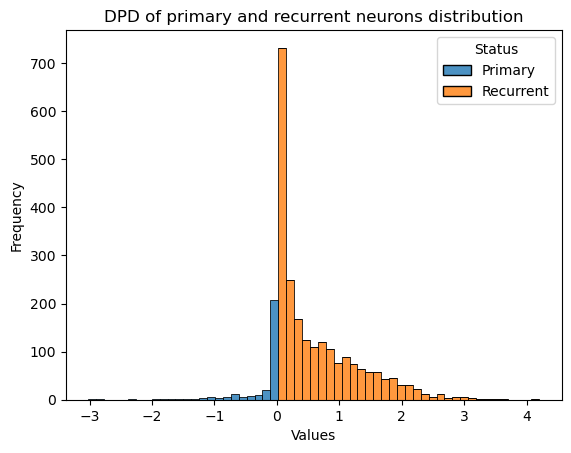

In [36]:

sns.histplot(data=dpd_scores_lincs_dim_annotated, x='DPD_pneu_rneu', hue='Status', multiple='stack', alpha=0.8)
plt.title('DPD of primary and recurrent neurons distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


### k fold validation